Python script that simulates a project financing model for renewable energy infrastructure, incorporating energy pricing data, PPA valuation, and hedging strategies:

# Renewable Energy Project Financing Model

This notebook demonstrates a comprehensive approach to modeling and analyzing renewable energy project financing. It includes two main parts:

## Part 1: Basic Model



Average NPV: $368,681,592.00
95% VaR of NPV: $5,932,938.34
Average PPA Value: $274.77
Average Swap Value: $12,630,624.25


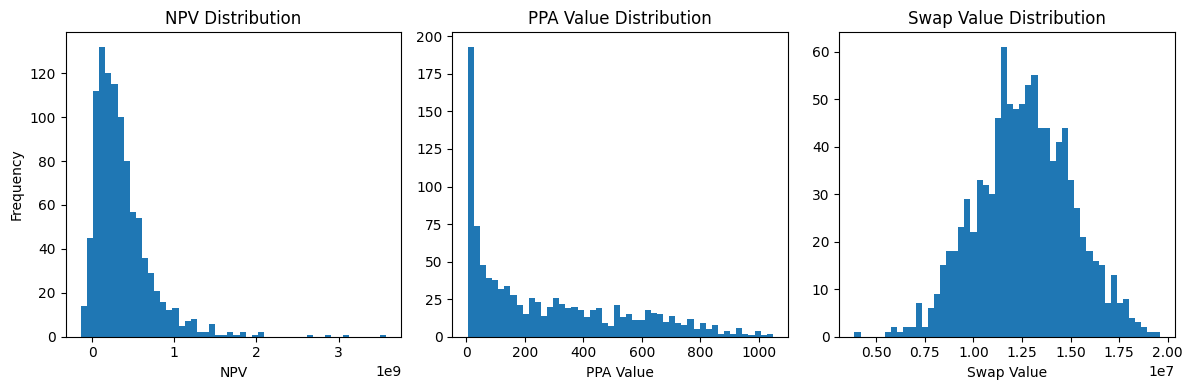

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulation parameters
n_years = 25
n_simulations = 1000
discount_rate = 0.08
initial_investment = 100000000

# Energy pricing model
def simulate_energy_prices(n_years, volatility=0.2, drift=0.02):
    prices = [50]  # Starting price
    for _ in range(n_years - 1):
        price = prices[-1] * np.exp((drift - 0.5 * volatility**2) + volatility * np.random.normal())
        prices.append(price)
    return prices

# PPA valuation
def ppa_valuation(energy_prices, fixed_price):
    return np.sum([max(fixed_price - price, 0) for price in energy_prices])

# Discounted Cash Flow (DCF) calculation
def calculate_dcf(cash_flows, discount_rate):
    return np.sum([cf / (1 + discount_rate)**t for t, cf in enumerate(cash_flows)])

# Net Present Value (NPV) calculation
def calculate_npv(dcf, initial_investment):
    return dcf - initial_investment

# Interest Rate Swap valuation
def interest_rate_swap_valuation(fixed_rate, floating_rates, notional):
    fixed_payments = notional * fixed_rate
    floating_payments = [notional * rate for rate in floating_rates]
    return np.sum(fixed_payments - np.array(floating_payments))

# Run simulation
npv_results = []
ppa_values = []
swap_values = []

for _ in range(n_simulations):
    # Simulate energy prices
    energy_prices = simulate_energy_prices(n_years)

    # Calculate project cash flows
    revenue = np.array(energy_prices) * 1000000  # Assuming 1 million MWh per year
    costs = np.full(n_years, 20000000)  # Assuming $20 million annual costs
    cash_flows = revenue - costs

    # Calculate NPV
    dcf = calculate_dcf(cash_flows, discount_rate)
    npv = calculate_npv(dcf, initial_investment)
    npv_results.append(npv)

    # PPA valuation
    ppa_value = ppa_valuation(energy_prices, 55)  # Assuming $55/MWh fixed price
    ppa_values.append(ppa_value)

    # Interest Rate Swap valuation
    floating_rates = np.random.normal(0.05, 0.01, n_years)  # Simulating floating rates
    swap_value = interest_rate_swap_valuation(0.06, floating_rates, 50000000)  # Assuming $50 million notional
    swap_values.append(swap_value)

# Results analysis
print(f"Average NPV: ${np.mean(npv_results):,.2f}")
print(f"95% VaR of NPV: ${np.percentile(npv_results, 5):,.2f}")
print(f"Average PPA Value: ${np.mean(ppa_values):,.2f}")
print(f"Average Swap Value: ${np.mean(swap_values):,.2f}")

# Visualizations
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(npv_results, bins=50)
plt.title("NPV Distribution")
plt.xlabel("NPV")
plt.ylabel("Frequency")

plt.subplot(132)
plt.hist(ppa_values, bins=50)
plt.title("PPA Value Distribution")
plt.xlabel("PPA Value")

plt.subplot(133)
plt.hist(swap_values, bins=50)
plt.title("Swap Value Distribution")
plt.xlabel("Swap Value")

plt.tight_layout()
plt.show()



This code covers:

1. **Energy Price Simulation**: Uses geometric Brownian motion to model future energy prices.
2. **PPA Valuation**: Calculates the value of a Power Purchase Agreement based on simulated market prices.
3. **DCF and NPV Calculations**: Computes the Discounted Cash Flow and Net Present Value of the project.
4. **Interest Rate Swap Valuation**: Simulates the value of an interest rate swap for hedging purposes.
5. **Monte Carlo Simulation**: Runs multiple scenarios to account for uncertainty in various parameters.
6. **Visualization**: Plots distributions of NPV, PPA value, and swap value.

## Part 2: Enhanced Model



Average NPV: $-42,356,208.58
95% VaR of NPV: $-42,356,208.58
Average PPA Value: $-21,169,570.28
Average Swap Value: $12,436,979.28
Average Derivative Value: $15,584,785.14


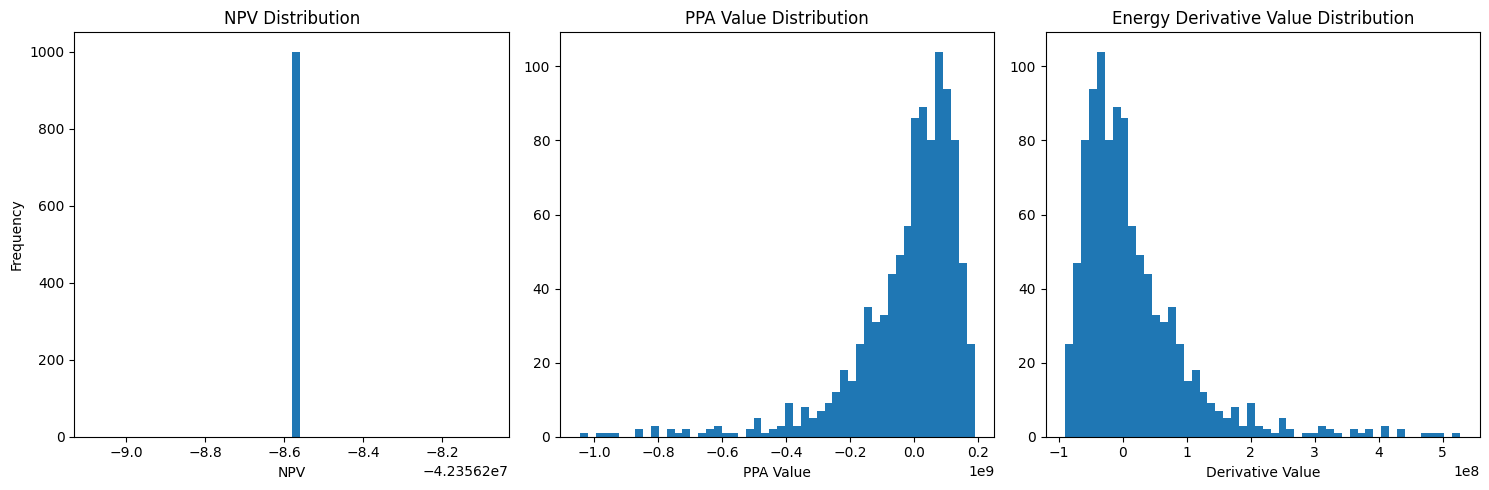

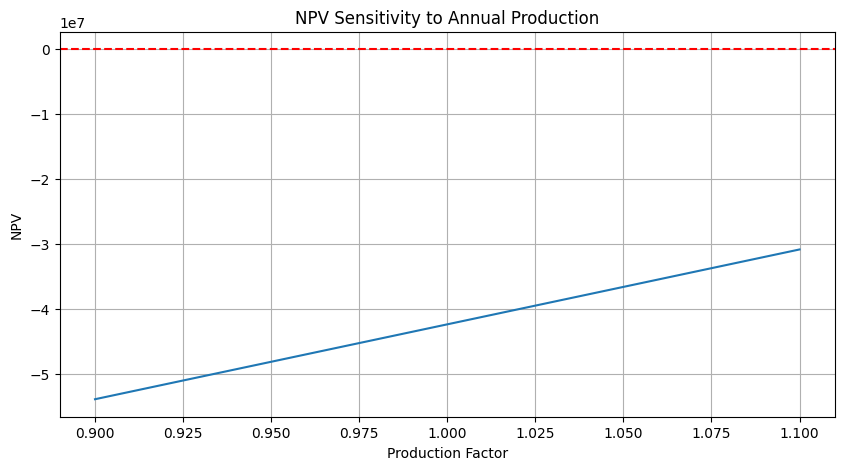

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Project parameters
project_life = 25  # years
initial_investment = 100_000_000  # $100 million
discount_rate = 0.08  # 8%
ppa_price = 50  # $/MWh
annual_production = 200_000  # MWh

# Energy price modeling
def simulate_energy_prices(years, initial_price=45, volatility=0.2, drift=0.02):
    prices = [initial_price]
    for _ in range(1, years):
        price = prices[-1] * np.exp((drift - 0.5 * volatility**2) + volatility * np.random.normal())
        prices.append(price)
    return prices

# DCF and NPV calculations
def calculate_dcf_npv(cash_flows, discount_rate, initial_investment):
    dcf = np.sum([cf / (1 + discount_rate)**t for t, cf in enumerate(cash_flows)])
    npv = dcf - initial_investment
    return dcf, npv

# PPA valuation
def ppa_valuation(market_prices, ppa_price, annual_production):
    return np.sum([(ppa_price - mp) * annual_production for mp in market_prices])

# Interest rate swap valuation
def interest_rate_swap_valuation(fixed_rate, floating_rates, notional):
    return np.sum((fixed_rate - floating_rates) * notional)

# Energy derivative (simple forward contract) valuation
def energy_derivative_valuation(strike_price, market_prices, volume):
    return np.sum([(mp - strike_price) * volume for mp in market_prices])

# Run simulation
n_simulations = 1000
npv_results = []
ppa_values = []
swap_values = []
derivative_values = []

for _ in range(n_simulations):
    # Simulate energy prices
    energy_prices = simulate_energy_prices(project_life)

    # Calculate project cash flows
    revenue = np.array([ppa_price * annual_production] * project_life)
    costs = np.full(project_life, 5_000_000)  # Assuming $5 million annual costs
    cash_flows = revenue - costs

    # Calculate DCF and NPV
    dcf, npv = calculate_dcf_npv(cash_flows, discount_rate, initial_investment)
    npv_results.append(npv)

    # PPA valuation
    ppa_value = ppa_valuation(energy_prices, ppa_price, annual_production)
    ppa_values.append(ppa_value)

    # Interest Rate Swap valuation
    floating_rates = np.random.normal(0.05, 0.01, project_life)  # Simulating floating rates
    swap_value = interest_rate_swap_valuation(0.06, floating_rates, 50_000_000)  # Assuming $50 million notional
    swap_values.append(swap_value)

    # Energy Derivative valuation
    derivative_value = energy_derivative_valuation(48, energy_prices, annual_production / 2)  # Hedging half of production
    derivative_values.append(derivative_value)

# Results analysis
print(f"Average NPV: ${np.mean(npv_results):,.2f}")
print(f"95% VaR of NPV: ${np.percentile(npv_results, 5):,.2f}")
print(f"Average PPA Value: ${np.mean(ppa_values):,.2f}")
print(f"Average Swap Value: ${np.mean(swap_values):,.2f}")
print(f"Average Derivative Value: ${np.mean(derivative_values):,.2f}")

# Visualizations
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(npv_results, bins=50)
plt.title("NPV Distribution")
plt.xlabel("NPV")
plt.ylabel("Frequency")

plt.subplot(132)
plt.hist(ppa_values, bins=50)
plt.title("PPA Value Distribution")
plt.xlabel("PPA Value")

plt.subplot(133)
plt.hist(derivative_values, bins=50)
plt.title("Energy Derivative Value Distribution")
plt.xlabel("Derivative Value")

plt.tight_layout()
plt.show()

# Sensitivity analysis
sensitivity_range = np.linspace(0.9, 1.1, 21)
npv_sensitivity = []

for factor in sensitivity_range:
    adjusted_production = annual_production * factor
    revenue = np.array([ppa_price * adjusted_production] * project_life)
    cash_flows = revenue - costs
    _, npv = calculate_dcf_npv(cash_flows, discount_rate, initial_investment)
    npv_sensitivity.append(npv)

plt.figure(figsize=(10, 5))
plt.plot(sensitivity_range, npv_sensitivity)
plt.title("NPV Sensitivity to Annual Production")
plt.xlabel("Production Factor")
plt.ylabel("NPV")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()



This enhanced version builds upon the basic model and adds:

1. **More Detailed Project Parameters**: Includes specific annual production and PPA price.
2. **Energy Derivative Valuation**: Adds a simple forward contract valuation for energy price hedging.
3. **Improved Visualization**: Includes an additional plot for energy derivative value distribution.
4. **Sensitivity Analysis**: Demonstrates how NPV changes with variations in annual production.

## Key Differences and Enhancements

1. The second model provides more detailed project-specific inputs.
2. It introduces energy derivative valuation, which is crucial for hedging strategies.
3. The sensitivity analysis in the second model offers insights into how changes in production affect project viability.
4. Both models use Monte Carlo simulation, but the second one provides a more comprehensive risk assessment.

## Conclusion

These models demonstrate how to validate project financing models for renewable energy infrastructure. They incorporate energy pricing data, PPA valuation, and hedging strategies to assess long-term viability and provide forecasts for lenders and investors.

The combination of DCF/NPV calculations, risk assessment through Monte Carlo simulation, and hedging valuations offers a robust framework for financial decision-making in renewable energy projects.
